# Загрузим библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pprint
from pymystem3 import Mystem
from collections import Counter

In [2]:
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = 10, 10
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_colwidth = 2000

# Загрузим датасет

In [3]:
df = pd.read_excel('psb.xlsx', sep = '\t', header = None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2443 entries, 0 to 2442
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2443 non-null   object
 1   1       2443 non-null   int64 
 2   2       2443 non-null   object
 3   3       2443 non-null   object
 4   4       2443 non-null   object
dtypes: int64(1), object(4)
memory usage: 95.6+ KB


# Предобработаем данные

In [5]:
cols = ['name', 'likes', 'region', 'business', 'purpose']
df.set_axis(cols, axis='columns', inplace=True)

In [6]:
df.head()

,name,likes,region,business,purpose
0,ИП ДОЛИЧ АНТОН АЛЕКСАНДРОВИЧ,194,Пермский край,Розничная торговля автозапчястями,Пополнение товарных остатков
1,ИП ЛИОРА ИЛЬЯ СЕРГЕЕВИЧ,2,Челябинская область,"Занимаюсь регистрацией ООО и ИП, помогая бизнесу зарегистрироваться без дополнительных расходов и походов в ИФНС и МФЦ. Работа в режиме одного окна, т.к. могу предоставить клиенту РКО, Эквайринг, ККТ, а также получить доступ к сервисам по отчётности. Оказываю качественные консультации, что помогает сэкономить предпринимателю на старте и пользоваться лучшими условиями на рынке. Также деятельностью компании является сопровождение торгов по 44 и 223 ФЗ. В связи с этим, считаю деятельность организации социально значимой, ибо при выходе с самоизоляции начинающий предприниматель сможет получить бесплатную консультацию при открытии компании, сэкономить на её регистрации и минимизировать потреченное время для сбора документов и походов в регистрирующие органы. Для тех, кто после регистрации бизнеса будет заниматься участием в госзакупках, также будет предоставлено всё необходимое в режиме одного окна. Осталось донести эту информацию до клиентов, в связи с чем хочу принять участие в конкурсе и получить грант на рекламную компанию своих услуг.",Данные средства планируются на рекламную компанию с целью привлечения большего числа клиентов.
2,ИП СОТИВОЛДИЕВ БАХТИЁР ТОШПУЛАТОВИЧ,2,Московская область,"Оказание услуги такси, Деятельность по чистке и уборке жилых зданий и нежилых помещений",развитие бизнеса
3,ИП ИВАНОВ АРТЕМ ЛЕОНИДОВИЧ,1902,Ростовская область,Продажа пластиковой фурнитуры для строительства,"Рекламный бюджет, оплата аренды складского помщения, рекламно-полиграфическая продукция."
4,"ИП БАБКИНА Г.В, ХРУМКА ЛАКОМКА",3,Алтайский край,"Производство и оптовая торговля зоотоварами. Компания производит сухие корма, лакомства сено, подстилки, засыпки для непродуктивных животных группы - грызуны, птицы, рыбы. Торгуем со всей Россией. От Владивостока и Южно Сахалинска. Омск, Томск, Новосибирск, Красноярск, Кемерово, Новокузнецк, Москва и т. д. заходим ( выделили площадки) на Вайлдбериз, Озон, Беру, Перекресток, Ашан, Метро, Утконос, Номер заказа 1611869","На перезапуск бизнеса, пополнение оборотных средств, создание новых рабочих мест"


In [7]:
for value in ['name', 'region', 'business', 'purpose']:
    df[value] = df[value].str.lower()

In [8]:
df['len_of_name'] = df['name'].apply(lambda x: len(x))
df['len_of_business'] = df['business'].apply(lambda x: len(x))
df['len_of_purpose'] = df['purpose'].apply(lambda x: len(x))

In [9]:
df.isnull().sum()

name               0
likes              0
region             0
business           0
purpose            0
len_of_name        0
len_of_business    0
len_of_purpose     0
dtype: int64

In [10]:
df.duplicated().sum()

0

# Максимальное/Минимальное описание в символах в названии компании

## Максимум

In [11]:
df['len_of_name'].max()

136

## Сколько таких компаний

In [12]:
df[df['len_of_name'] == 136]

,name,likes,region,business,purpose,len_of_name,len_of_business,len_of_purpose
2352,"профессиональное образовательное учреждение спортивно-стрелковый клуб ""снайпер"" регионального отделения досааф россии смоленской области",50,смоленская область,"образовательная деятельность, обучение стрельбе детей и взрослых, обучение безопасному обращению с оружием","покрытие задолженности перед сторонними организациями. (пао ""квадра"", ао ""атомэнергосбыт"", уво внг, ремонт стрелковой галереи",136,106,125


## Минимум

In [13]:
df['len_of_name'].min()

2

In [14]:
df[df['len_of_name'] == 2].count()

name               7
likes              7
region             7
business           7
purpose            7
len_of_name        7
len_of_business    7
len_of_purpose     7
dtype: int64

### 7 человек решили написать в описании бизнес "ИП"

# Максимальное/Минимальное описание в символах в описании бизнеса

## Максимум

In [15]:
df['len_of_business'].max()

2000

## Сколько таких компаний

In [16]:
df[df['len_of_business'] == 2000].count()

name               3
likes              3
region             3
business           3
purpose            3
len_of_name        3
len_of_business    3
len_of_purpose     3
dtype: int64

## Минимум

In [17]:
df['len_of_business'].min()

3

## Сколько таких компаний

In [18]:
df[df['len_of_business'] == 3].count()

name               5
likes              5
region             5
business           5
purpose            5
len_of_name        5
len_of_business    5
len_of_purpose     5
dtype: int64

In [19]:
df[df['len_of_business'] == 3]

,name,likes,region,business,purpose,len_of_name,len_of_business,len_of_purpose
39,ип миханив артур андреевич,2,самарская область,бар,"выплата аренды помещения,закупка оборотной продукции,выплата зарплаты сотруднику.",26,3,81
193,"общество с ограниченной ответственностью ""ремонтно-эксплуатационный участок""",2,хабаровский край,жкх,"оплата труда работников, оплата товаров,оплата услуг организаций за оуазанные услуги, оплата нужд предприятия( эл.энергия, налоги и т.д.)",76,3,137
317,ип галеева ралина радиковна,2,челябинская область,смр,"развитие бизнеса с 0 , создание бригады",27,3,39
815,индивидуальный предприниматель,2,иркутская область,жкх,на приобретение оборудования,30,3,28
839,индивидуальный предприниматель,4,иркутск,жкх,на приобретение оборудования,30,3,28


# Максимальное/Минимальное описание в символах в описании цели гранта

## Максимум

In [20]:
df['len_of_purpose'].max()

1996

## Сколько таких компаний

In [21]:
df[df['len_of_purpose'] == 1996].count()

name               1
likes              1
region             1
business           1
purpose            1
len_of_name        1
len_of_business    1
len_of_purpose     1
dtype: int64

## Минимум

In [22]:
df['len_of_purpose'].min()

5

In [23]:
df[df['len_of_purpose'] == 5].count()

name               1
likes              1
region             1
business           1
purpose            1
len_of_name        1
len_of_business    1
len_of_purpose     1
dtype: int64

In [24]:
df[df['len_of_purpose'] == 5]

,name,likes,region,business,purpose,len_of_name,len_of_business,len_of_purpose
77,"общество с ограниченной ответственностью ""аксиома""",2,санкт-петербург,рекламное агентство,на зп,50,19,5


## Кто самые большие/самые слабые писаки в описании бизнеса (Медиана)

In [25]:
df.groupby('region').median().sort_values('len_of_business', ascending=False).head()

,likes,len_of_name,len_of_business,len_of_purpose
region,,,,
владимир,732.00,48.00,"1,275.00","1,956.00"
курганская область,3.00,29.00,825.00,32.00
екатеринбург,2.00,2.00,492.00,123.00
тюмень,"3,682.00",45.00,436.00,339.00
магнитогорск,191.00,10.00,366.00,24.00


In [26]:
df.groupby('region').median().sort_values('len_of_business', ascending=False).tail()

,likes,len_of_name,len_of_business,len_of_purpose
region,,,,
республика калмыкия,2.00,28.00,30.00,28.00
республика тыва,3.50,19.00,25.50,34.50
краснодар,2.00,4.00,23.00,22.00
новосибирск,313.00,48.00,21.00,46.00
волгоград,3.00,7.50,14.00,46.00


## Кто самые большие/самые слабые писаки в описании гранта  (Медиана)

In [27]:
df.groupby('region').median().sort_values('len_of_purpose', ascending=False).head()

,likes,len_of_name,len_of_business,len_of_purpose
region,,,,
владимир,732.00,48.00,"1,275.00","1,956.00"
севастополь,3.50,50.50,264.00,587.50
тюмень,"3,682.00",45.00,436.00,339.00
ненецкий ао,2.00,26.00,318.00,327.00
сочи,130.00,46.00,284.50,243.00


In [28]:
df.groupby('region').median().sort_values('len_of_purpose', ascending=False).tail()

,likes,len_of_name,len_of_business,len_of_purpose
region,,,,
республика калмыкия,2.00,28.00,30.00,28.00
астраханская область,17.00,32.00,80.00,28.00
магнитогорск,191.00,10.00,366.00,24.00
республика саха,11.00,33.00,102.00,22.00
краснодар,2.00,4.00,23.00,22.00


## Описательные статистики

In [29]:
df[['likes', 'len_of_business', 'len_of_purpose', 'len_of_name']].describe()

,likes,len_of_business,len_of_purpose,len_of_name
count,"2,443.00","2,443.00","2,443.00","2,443.00"
mean,213.07,248.63,121.99,39.74
std,990.24,395.93,214.13,17.88
min,2.00,3.00,5.00,2.00
25%,3.00,39.00,31.00,28.00
50%,6.00,86.00,57.00,32.00
75%,53.00,250.00,109.50,52.00
max,"16,243.00","2,000.00","1,996.00",136.00


(-5, 300)

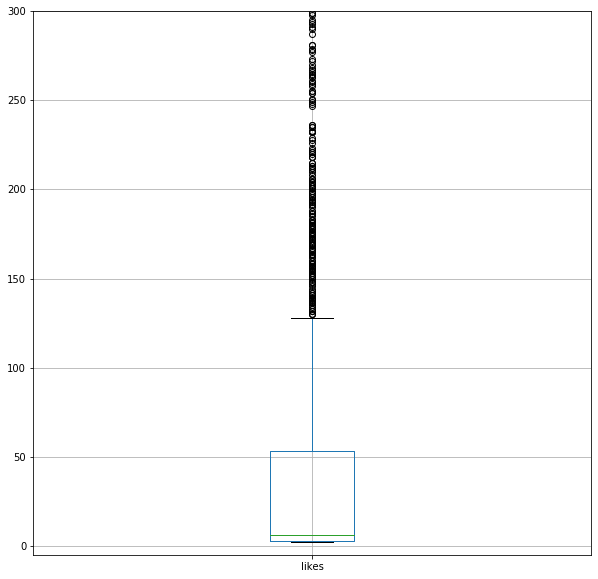

In [30]:
ax = df.boxplot(['likes'], figsize = (10, 10))
ax.set_ylim([-5, 300])

In [31]:
def delete_outliers(df, column, graphic = 0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)                 
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    filter = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[filter].boxplot([column], figsize = (x, y))
    else:
        return df.loc[filter]

In [32]:
delete_outliers(df,'likes', 0)['likes'].mean()

16.5568570034163

(-5, 300)

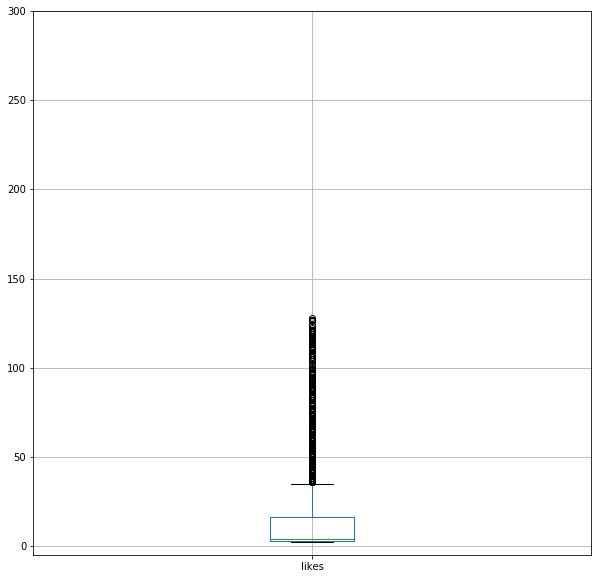

In [33]:
ax = delete_outliers(df,'likes', 1)
ax.set_ylim([-5, 300])

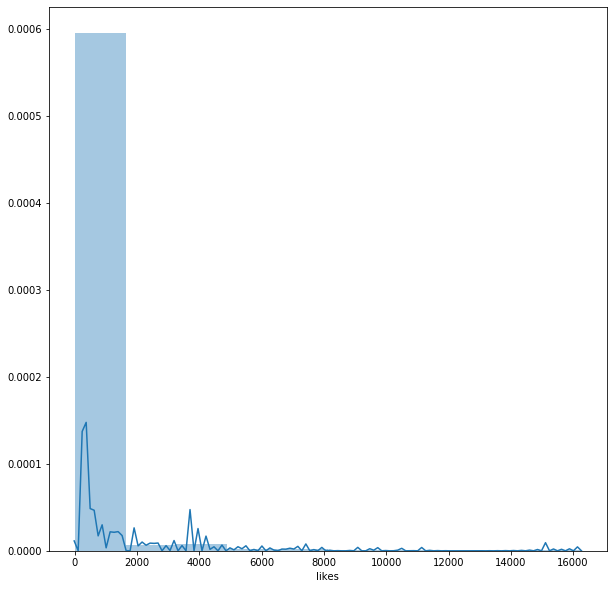

In [34]:
sns.distplot(df['likes'], bins=10)

## Сколько всего регионов

In [35]:
df['region'].nunique()

95

## Откуда больше всего заявок

In [36]:
number_of_applications = df['region'].value_counts().reset_index()

In [37]:
cols = ['region', 'application_count']
number_of_applications.set_axis(cols, axis='columns', inplace=True)

In [38]:
number_of_applications.head()

,region,application_count
0,москва,237
1,санкт-петербург,136
2,московская область,135
3,республика татарстан,95
4,краснодарский край,93


## Откуда меньше всего заявок

In [39]:
number_of_applications[number_of_applications['application_count'] == 1]

,region,application_count
79,екатеринбург,1
80,рязань,1
81,владимир,1
82,магнитогорск,1
83,самара,1
84,нижний новгород,1
85,республика калмыкия,1
86,курганская область,1
87,тюмень,1
88,белгород,1


## Сколько таких регионов

In [40]:
len(number_of_applications[number_of_applications['application_count'] == 1])

16

## Есть ли корреляция между лайками и текстами

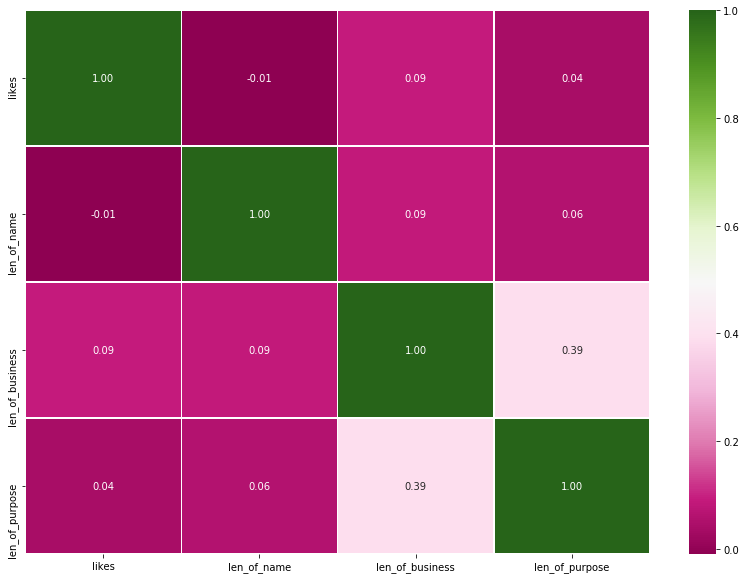

In [41]:
cm = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, cmap="PiYG")
plt.show()

# А что в Чувашской Республике?

In [42]:
chuvash_republic = df[df['region'] == 'чувашская республика']

## Сколько заявок из ЧР

In [43]:
df[df['region'] == 'чувашская республика']['region'].count()

26

In [44]:
chuvash_republic.head(26)

,name,likes,region,business,purpose,len_of_name,len_of_business,len_of_purpose
273,ooo торгово-производственная компания «тандем «,33,чувашская республика,оптовая торговля непродовольственных товаров,"закупка комплектующих для инструментов, аренда помещения, приобретение товаров для оптовой торговли",47,44,99
381,индивидуальный предприниматель григорьев валерий григорьевич,36,чувашская республика,"здравствуйте. немного ситуация у меня нестандартная, долгая. ип оформлено на отца, ему 73 года, по сути работаю я, сын 40 лет, но я в процедуре банкротства третий год, седьмой год в судах. но дух предпринимательства во мне стал еще ярче, бизнес это риски, было падение, но поднимаюсь, борюсь. в настоящее время занимаюсь стиркой уже больше года, кстати в субсидиях отказано, хотя оквэд 96.01 и в перечне отраслей наиболее пострадавших, наверное смотрят на возраст ип, что дедушка не будет ходить выяснять. работы стало меньше – это факт. были планы развиваться, для чего были приобретены два б/у мощных гладильных каландра, производительностью 50 кг/час каждый в феврале этого года. но вирус поменял планы, так и стоят без дела. стирка продолжается в микрообъемах, глажу утюгами и катком. стираю бытовыми машинами. параллельно ищу новые направления развития (возможное производство косметики и корректирующего фигуру и лицо трикотажных полотен). временно, пока сезон промываю узлы отопления в школах. короче супер микро-бизнес, который планирует стать крупным. п.с. все договора, накладные, пруфы (фото), на стирку, оборудование, на опрессовку, выписки с банка готов предоставить.","здравствуйте. средства требуются на приобретение промышленной стиральной машины с загрузкой 20 кг или на самую простую ручную линию фасовки, вижу новое направление деятельности по фасовке косметической продукции. на что хватит. но я рано или поздно их все равно приобрету, сейчас сложно, но я не сижу на месте, занялся опрессовкой и промывкой узлов отопления, правда очень сезонный летний бизнес, немного ремонтирую холодильное оборудование. стирка скоро возобновиться. в первую очередь (ниже написано) т.к. я потерпел фиаско, миллионы прогорели в прошлом бизнесе, хотел бы направить эти средства (ваш грант) на организацию работы платформы www.фонд127.рф и зеркало www.fund127.ru я еще хотел в прошлом году начать, но не хватило ресурсов, в этом году уже зарегистрировал два домена в марте (фонд127.рф fund127.ru), это по номеру закона о банкротстве юридических лиц №127-фз. готовы все учредительные документы, понемногу разрабатываю сайт, но не могу пока зарегистрировать, минюсты все закрыто было в период пандемии. т.к. я знаю, что такое когда теряешь бизнес, когда друзья и родственники отворачиваются, проходишь запой и т.д. а сколько суицида на этом фоне, и при нынешней ситуации таких будет еще больше, тех, кто потеряет свой бизнес. организуя платформу поддержки, я уверен, что помогу многим, что предприниматель не останется наедине со своими проблемами, будет трудно, но институт банкротства, и отношения к нему надо менять и могут это сделать только предприниматели, а я знаю, как им помочь выбраться со дна, проходил. но именно такие как мы строят бизнес, микро, мини, но он наш.",60,1180,1592
426,"ooo ""центр здоровья ""персона""",2,чувашская республика,аппаратная коррекция фигуры и снижение веса,на восстановление и развитие бизнеса,29,43,36
446,"общество с ограниченной ответственностью ""энергопроммонтаж""",2,чувашская республика,участие в тендерах,на своевременное выполнение поставок товаров по заключенным договорам,59,18,69
568,ип александрова ольга ивановна,4,чувашская республика,интернет-магазин,средства требуются на покупку коммерческой недвижимости,30,16,55
588,ип исакова а.ю.,2,чувашская республика,пошив крестильной одежды,покупка оборудования,15,24,20
700,"общество с ограниченной ответственностью ""люмен""",130,чувашская республика,"розничная торговля электрохозтоваров в магазине в микрорайоне ""университет"" г.чебоксары, поставка товаров в бюджетные организации (общеобразовате

In [45]:
chuvash_republic.sort_values('likes', ascending=False)[['name', 'likes']].head()

,name,likes
1676,"общество с ограниченной ответственностью ""элит-тур""",488
2056,"ооо ""ипф""",308
2174,"общество с ограниченной ответственностью ""чебоксарская фабрика дверей плюс""",270
2353,ип петров валерий германович,163
700,"общество с ограниченной ответственностью ""люмен""",130


In [46]:
chuvash_republic.sort_values('likes')[['name', 'likes']].head()

,name,likes
426,"ooo ""центр здоровья ""персона""",2
446,"общество с ограниченной ответственностью ""энергопроммонтаж""",2
588,ип исакова а.ю.,2
742,"общество с ограниченной ответственностью ""прайм-сервис""",2
944,ип захаров владимир викентьевич,2


In [47]:
chuvash_republic['name'].tolist()

['ooo торгово-производственная компания «тандем «',
 'индивидуальный предприниматель григорьев валерий григорьевич',
 'ooo "центр здоровья "персона"',
 'общество с ограниченной ответственностью "энергопроммонтаж"',
 'ип александрова ольга ивановна',
 'ип исакова а.ю.',
 'общество с ограниченной ответственностью "люмен"',
 'общество с ограниченной ответственностью "прайм-сервис"',
 'ип захаров владимир викентьевич',
 'ип григорьев евгений геннадьевич',
 'го жск',
 'ип михайлов дмитрий олегович',
 'общество с ограниченной ответственностью "главтекс"',
 'индивидуальный предприниматель петров владимир анатольевич',
 'общество с ограниченной ответственностью "элит-тур"',
 'общество с ограниченной ответственностью "термодиал"',
 'ип федотов евгений валерьевич',
 'ип иванов александр юрьевич',
 'общество с ограниченной ответственностью "альянс а"',
 'ип коновалов ярослав владимирович',
 'ип тихонов алексей юрьевич',
 'общество с ограниченной ответственностью "инвестснаб"',
 'ооо "ипф"',
 'общ

## Какие слова используют при описании названия, бизнеса, цели гранта

In [48]:
business_description = df['business'].unique().tolist()
purpose_description = df['purpose'].unique().tolist()

In [49]:
m = Mystem()
business_description_string = '; '.join(business_description)
purpose_description_string = '; '.join(purpose_description)

In [50]:
lemmas_business = m.lemmatize(business_description_string)
pprint.pprint(Counter(lemmas_business))

Counter({' ': 65323,
         ', ': 5807,
         '.': 5502,
         'и': 3649,
         'в': 2709,
         '; ': 2259,
         'на': 1126,
         'с': 1080,
         'для': 1034,
         'мы': 850,
         'по': 795,
         '-': 676,
         'наш': 652,
         'год': 566,
         'услуга': 527,
         ' (': 511,
         'ребенок': 455,
         ' - ': 415,
         'не': 414,
         'быть': 396,
         ' "': 389,
         'деятельность': 385,
         'компания': 377,
         'бизнес': 348,
         'работа': 344,
         'продажа': 321,
         'это': 310,
         'производство': 305,
         'который': 296,
         'а': 291,
         'из': 287,
         'работать': 283,
         'весь': 279,
         ': ': 273,
         'к': 266,
         'от': 266,
         'торговля': 265,
         'свой': 262,
         'за': 260,
         'как': 256,
         'город': 251,
         'организация': 248,
         'детский': 243,
         'магазин': 237,
         ' «': 237,

         'юг': 5,
         'оценивать': 5,
         'банкетный': 5,
         'нарабатывать': 5,
         'да': 5,
         'поработать': 5,
         'резкий': 5,
         'демонстрация': 5,
         'кинофильм': 5,
         'недавно': 5,
         '.; ': 5,
         'алтай': 5,
         'банковский': 5,
         'издательский': 5,
         'сразу': 5,
         'забывать': 5,
         'лицензионный': 5,
         'рекламодатель': 5,
         '( ': 5,
         'традиционный': 5,
         'прекращать': 5,
         'важно': 5,
         'измельчитель': 5,
         'популярный': 5,
         'посмотреть': 5,
         'поиграть': 5,
         'оренбург': 5,
         'декоративный': 5,
         'воспитывать': 5,
         'ру': 5,
         'макияж': 5,
         'пфр': 5,
         'подрядчик': 5,
         'гражданский': 5,
         'разработчик': 5,
         'китайский': 5,
         'бюро': 5,
         'посредством': 5,
         'представительство': 5,
         'гостевой': 5,
         'городок': 5,


         'мсп': 2,
         'композитный': 2,
         'декорирование': 2,
         'снаружи': 2,
         'комфорт': 2,
         'смк': 2,
         '22000': 2,
         'обновляться': 2,
         'договоренность': 2,
         'юридически': 2,
         'заключенный': 2,
         'скобяной': 2,
         'теоретический': 2,
         'дисциплина': 2,
         'парашютный': 2,
         'водолазный': 2,
         'прыжок': 2,
         'погружение': 2,
         'присвоение': 2,
         'аттестационный': 2,
         'трудоустройство': 2,
         'поисково-спасательный': 2,
         'вс': 2,
         'досааф': 2,
         'детейлинг': 2,
         'терасса': 2,
         'задумывать': 2,
         'автоцентр': 2,
         'букинистический': 2,
         'книжный': 2,
         'ненужный': 2,
         'макулатура': 2,
         'новинка': 2,
         'реалия': 2,
         '430': 2,
         'открыто': 2,
         '140': 2,
         'кровать': 2,
         'включаться': 2,
         'нюанс': 2,
       

         'инвестировать': 1,
         'nesaharbar': 1,
         'понятно': 1,
         'расселение': 1,
         'будка': 1,
         'прировнять': 1,
         'smoothie': 1,
         'bar': 1,
         'выкупать': 1,
         'трукост': 1,
         'гравировальный': 1,
         'фотопроявка': 1,
         'фотографирование': 1,
         'предметный': 1,
         'фотокалендарь': 1,
         'фотокнига': 1,
         'ретушь': 1,
         'непросто': 1,
         'динамичный': 1,
         'навязчивый': 1,
         'фабрикасчет': 1,
         'simdistrib': 1,
         'экспедиционный': 1,
         'кинг': 1,
         'консоль': 1,
         'sony': 1,
         'интересоваться': 1,
         'веселый': 1,
         'дм': 1,
         'мк': 1,
         'направляться': 1,
         'усадьба': 1,
         'ruspodvor': 1,
         'топливный': 1,
         'пеллет': 1,
         'древесный': 1,
         'tattoo': 1,
         'beauty': 1,
         'ферментация': 1,
         'низкокачественный': 1,
     

         'развернутый': 1,
         'удаленка': 1,
         'возвращать': 1,
         '2ух': 1,
         'мариинский': 1,
         'балетный': 1,
         'глубинка': 1,
         'больше': 1,
         'крутиться': 1,
         'шахматы': 1,
         'приведение': 1,
         'потерянный': 1,
         'росстат': 1,
         'росалкогольрегулирование': 1,
         'тсж': 1,
         'жск': 1,
         'обращать': 1,
         'ландшафт': 1,
         'санитарно-защитный': 1,
         'судебный': 1,
         'строитено': 1,
         'элегантный': 1,
         'муром': 1,
         'тархан': 1,
         'впереди': 1,
         '47.51': 1,
         'иванов': 1,
         '55м2': 1,
         'освобождаться': 1,
         '4500': 1,
         'рукодельница': 1,
         '1864г': 1,
         '03.01': 1,
         'биокосметика': 1,
         'напротив': 1,
         'лавра': 1,
         'частичка': 1,
         'намечать': 1,
         '......': 1,
         'настроение': 1,
         'образвание': 1,
       

In [51]:
cleaned_lemmas_business = []
for word in lemmas_business:
    if len(word) > 3:
        cleaned_lemmas_business.append(word)
pprint.pprint(Counter(cleaned_lemmas_business))

Counter({'услуга': 527,
         'ребенок': 455,
         'быть': 396,
         'деятельность': 385,
         'компания': 377,
         'бизнес': 348,
         'работа': 344,
         'продажа': 321,
         'производство': 305,
         'который': 296,
         'работать': 283,
         'весь': 279,
         'торговля': 265,
         'свой': 262,
         'город': 251,
         'организация': 248,
         'детский': 243,
         'магазин': 237,
         'центр': 234,
         'клиент': 233,
         'заниматься': 229,
         'являться': 219,
         'розничный': 217,
         'человек': 206,
         'ремонт': 187,
         'также': 184,
         'оборудование': 179,
         'основной': 177,
         'новый': 174,
         'товар': 170,
         'направление': 166,
         'развитие': 166,
         'область': 162,
         'этот': 161,
         'проект': 158,
         'время': 150,
         'россия': 147,
         'предприятие': 147,
         'сфера': 142,
         'продукция'

         'диплом': 7,
         'яркий': 7,
         'пополнение': 7,
         'лишать': 7,
         'алюминиевый': 7,
         'социализация': 7,
         'проверять': 7,
         'безопасный': 7,
         'добавлять': 7,
         'поле': 7,
         'сварочный': 7,
         'стекло': 7,
         'хранение': 7,
         'товарный': 7,
         'кольцо': 7,
         'квеста': 7,
         'совместно': 7,
         'гармоничный': 7,
         'осень': 7,
         'содержать': 7,
         'знак': 7,
         'финансирование': 7,
         'паста': 7,
         'возможно': 7,
         'квартал': 7,
         'конкурентный': 7,
         'основание': 7,
         'фундамент': 7,
         'барнаул': 7,
         'ставропольский': 7,
         'организатор': 7,
         'характер': 7,
         'орхидея': 7,
         'выставочный': 7,
         'путь': 7,
         'вывоз': 7,
         'знакомый': 7,
         'lego': 7,
         'планетарий': 7,
         'телескоп': 7,
         'торги': 6,
         'фурни

         'челн': 3,
         'нестандартный': 3,
         'дедушка': 3,
         'мощный': 3,
         'срезать': 3,
         'стратегический': 3,
         'приниматься': 3,
         'сушка': 3,
         'окружающий': 3,
         'вредный': 3,
         'влияние': 3,
         'заканчиваться': 3,
         'безработный': 3,
         'консультировать': 3,
         'немецкий': 3,
         'календарь': 3,
         'популярно': 3,
         'загрузка': 3,
         'ознакомляться': 3,
         'неметаллический': 3,
         'hostel': 3,
         'знакомить': 3,
         'учредитель': 3,
         'господдержка': 3,
         'корейский': 3,
         'ценовый': 3,
         'тревел': 3,
         'диск': 3,
         'столица': 3,
         'разливной': 3,
         'хоккейный': 3,
         'электро': 3,
         'космос': 3,
         'суметь': 3,
         'автомойка': 3,
         'полагать': 3,
         'ижевск': 3,
         'тимбилдинг': 3,
         'заметно': 3,
         'нерудный': 3,
         'чер

         'когалым': 2,
         'дружба': 2,
         'народ': 2,
         'звонить': 2,
         'афиша': 2,
         'бизнесмен': 2,
         'улыбка': 2,
         'выпускница': 2,
         'участница': 2,
         'васильев': 2,
         'одиночка': 2,
         'лыжа': 2,
         'густонаселенный': 2,
         'жительство': 2,
         'социальноориентированный': 2,
         'перепел': 2,
         'свинина': 2,
         'молодняк': 2,
         'анкета': 2,
         'подземный': 2,
         'проанализировать': 2,
         'продолжительный': 2,
         'аналитический': 2,
         'труппа': 2,
         'наклейка': 2,
         'немалый': 2,
         'роль': 2,
         'розыгрыш': 2,
         'лакокрасочный': 2,
         ' %, ': 2,
         'оценочный': 2,
         'окупаемость': 2,
         'проекционный': 2,
         '2000': 2,
         'вильма': 2,
         '15.05': 2,
         'мечтать': 2,
         'пропускной': 2,
         'оптимакрос': 2,
         'угольный': 2,
         'bere

         'шоколатье': 1,
         'демонстрировать': 1,
         'какао-бобы': 1,
         'уносить': 1,
         'впечатление': 1,
         'ложный': 1,
         'скромность': 1,
         'павлик': 1,
         'любимец': 1,
         '25000': 1,
         'национальноя': 1,
         'ного': 1,
         'russian': 1,
         'awards': 1,
         '3500': 1,
         'осмотр': 1,
         'блузка': 1,
         'портфель': 1,
         'палаточный': 1,
         'военно-спортивный': 1,
         'духовно': 1,
         'нравственный': 1,
         'инструкторский': 1,
         'плодотворно': 1,
         'преодоление': 1,
         'лидерский': 1,
         'взаимопомощь': 1,
         'общественность': 1,
         'каникулярный': 1,
         'командообразующий': 1,
         'копицентр': 1,
         'хэндмэйд': 1,
         'прошодимость': 1,
         'случаться': 1,
         'болеть': 1,
         'биоимпедансный': 1,
         'анализатор': 1,
         'ожирение': 1,
         'смертность': 1,
     

         'заготовлять': 1,
         'кониводство': 1,
         'праздникомить': 1,
         'малонаселенный': 1,
         '200км': 1,
         '250тыс': 1,
         '84тыс': 1,
         '33тыс': 1,
         '12тыс': 1,
         'задеть': 1,
         'обученный': 1,
         'фотографироваться': 1,
         'загран': 1,
         'наблюдаться': 1,
         'тува': 1,
         'сенкевич': 1,
         'операторский': 1,
         'испания': 1,
         'австралия': 1,
         'соотечественник': 1,
         'трехдневный': 1,
         'велосипедный': 1,
         'природоведение': 1,
         'акрил': 1,
         'пленэр': 1,
         'дляженщина': 1,
         'телематический': 1,
         'скол': 1,
         'автостекло': 1,
         'автосигнализация': 1,
         '2027': 1,
         'корчагин': 1,
         'новоуральский': 1,
         'дипломант': 1,
         'установщик': 1,
         'бронзовый': 1,
         'призер': 1,
         'бета-тестер': 1,
         'новоуральск': 1,
         'эвла

         'ценообразующий': 1,
         'чехия': 1,
         'моральный': 1,
         'обсервация': 1,
         'цаца': 1,
         'потребительский': 1,
         'автобизнес': 1,
         'неоплачиваемый': 1,
         'svoyaderevnya': 1,
         'научно-производственный': 1,
         'никор': 1,
         'обеззараживание': 1,
         'высокочастотный': 1,
         'челюстно-лицевой': 1,
         'дерматология': 1,
         'сосудистый': 1,
         'нейрохирургия': 1,
         'офтальмологический': 1,
         'ультразвуковой': 1,
         'гнойный': 1,
         'ожоговый': 1,
         'показание': 1,
         'щадить': 1,
         'патологический': 1,
         'высокодоходный': 1,
         'разговорный': 1,
         'акушер': 1,
         'гинеколог': 1,
         'диета': 1,
         'ароматерапия': 1,
         'музыкотерапия': 1,
         'должно': 1,
         'практиковать': 1,
         'педиатр': 1,
         'ухаживать': 1,
         'роддом': 1,
         'лактация': 1,
         'н

In [52]:
w = Counter(cleaned_lemmas_business)
df_clb = pd.DataFrame.from_dict(w, orient='index').reset_index()
df_clb = df_clb.sort_values(by=0, ascending=False).head(20)

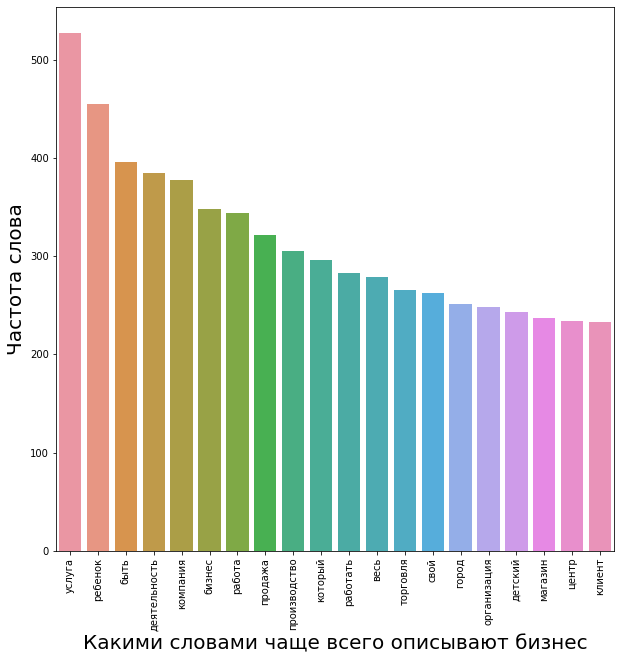

In [53]:
ax = sns.barplot(x = "index", y = 0, data = df_clb)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_xlabel(xlabel='Какими словами чаще всего описывают бизнес', size = 20)
ax.set_ylabel(ylabel='Частота слова', size = 20)
ax

In [54]:
lemmas_purpose = m.lemmatize(purpose_description_string)
pprint.pprint(Counter(lemmas_purpose))

Counter({' ': 30192,
         ', ': 2785,
         '.': 2163,
         '; ': 2097,
         'на': 1583,
         'и': 1449,
         'в': 975,
         'для': 855,
         'средство': 489,
         'новый': 422,
         'аренда': 410,
         'оборудование': 398,
         'с': 394,
         'по': 391,
         'бизнес': 373,
         'оплата': 373,
         ' (': 337,
         'закупка': 321,
         '-': 292,
         'сотрудник': 264,
         'плата': 247,
         'развитие': 245,
         'мы': 243,
         'реклама': 202,
         'покупка': 201,
         'работа': 197,
         'услуга': 192,
         'выплата': 190,
         'не': 187,
         'быть': 186,
         'товар': 180,
         'заработный': 174,
         'приобретение': 174,
         'оборотный': 170,
         'помещение': 169,
         'наш': 169,
         'за': 169,
         'материал': 155,
         'деятельность': 154,
         'пополнение': 150,
         ',': 150,
         'зарплата': 140,
         'клиент

         'цвет': 2,
         'сахар': 2,
         'готовить': 2,
         'вкусный': 2,
         'попробовать': 2,
         'ускорение': 2,
         'власть': 2,
         'сталкиваться': 2,
         'грузоперевозка': 2,
         'велосипед': 2,
         'пл': 2,
         'вы': 2,
         'полтора': 2,
         'засыхать': 2,
         'диплом': 2,
         'печатать': 2,
         'баскетбол': 2,
         'общение': 2,
         'совет': 2,
         'здоровый': 2,
         '-, ': 2,
         'вышивальный': 2,
         'освоение': 2,
         'свежий': 2,
         'креативный': 2,
         'шкаф': 2,
         'искусственный': 2,
         'автоматический': 2,
         'письмо': 2,
         'приспособлять': 2,
         'турпродукт': 2,
         'больничный': 2,
         'мозг': 2,
         'теплица': 2,
         'фрезерный': 2,
         'чпу': 2,
         'инклюзивный': 2,
         'руководитель': 2,
         'республика': 2,
         'хакасия': 2,
         'футболка': 2,
         'робот': 

         'купля': 1,
         'вне': 1,
         'перемещение': 1,
         'встреча': 1,
         'устаревать': 1,
         'случаться': 1,
         'недвижимый': 1,
         'отлагательство': 1,
         'подвергать': 1,
         'подростковый': 1,
         'писатель': 1,
         'ирина': 1,
         'рогалева': 1,
         'пасхальный': 1,
         'миссионер': 1,
         'протоиерей': 1,
         'андрей': 1,
         'ткачева': 1,
         'священник': 1,
         'валерия': 1,
         'духанин': 1,
         'рак': 1,
         'доверяться': 1,
         'бог': 1,
         'хостелрегион51': 1,
         'спячка': 1,
         'сми': 1,
         'взятие': 1,
         'кировск': 1,
         'оклад': 1,
         '15000': 1,
         'радиостанция': 1,
         '18': 1,
         'обязательно': 1,
         'возрождать': 1,
         'прерывать': 1,
         'цепочка': 1,
         'консалтинговый': 1,
         'доля': 1,
         'топпер': 1,
         'чехол': 1,
         'сидение': 1,
  

In [55]:
cleaned_lemmas_purpose = []
for word in lemmas_purpose:
    if len(word) > 3:
        cleaned_lemmas_purpose.append(word)
pprint.pprint(Counter(cleaned_lemmas_purpose))

Counter({'средство': 489,
         'новый': 422,
         'аренда': 410,
         'оборудование': 398,
         'бизнес': 373,
         'оплата': 373,
         'закупка': 321,
         'сотрудник': 264,
         'плата': 247,
         'развитие': 245,
         'реклама': 202,
         'покупка': 201,
         'работа': 197,
         'услуга': 192,
         'выплата': 190,
         'быть': 186,
         'товар': 180,
         'заработный': 174,
         'приобретение': 174,
         'оборотный': 170,
         'помещение': 169,
         'материал': 155,
         'деятельность': 154,
         'пополнение': 150,
         'зарплата': 140,
         'клиент': 137,
         'требоваться': 134,
         'расширение': 133,
         'ремонт': 127,
         'восстановление': 127,
         'компания': 124,
         'создание': 114,
         'платеж': 111,
         'рекламный': 107,
         'арендный': 107,
         'который': 107,
         'необходимый': 104,
         'запуск': 104,
         'откр

         'популяризация': 2,
         'красота': 2,
         'закупочный': 2,
         'лицензирование': 2,
         'автопарк': 2,
         'накладной': 2,
         'например': 2,
         '2гис': 2,
         'стойка': 2,
         'издержки': 2,
         'рейтинг': 2,
         'отзыв': 2,
         'подробный': 2,
         'развлечение': 2,
         'подписывать': 2,
         'вознаграждение': 2,
         'высоко': 2,
         'турция': 2,
         'понадобиться': 2,
         'фактически': 2,
         'авиакомпания': 2,
         'отчисление': 2,
         'кадровый': 2,
         'временной': 2,
         '18000': 2,
         '75000': 2,
         'интересно': 2,
         'инвестировать': 2,
         'клиника': 2,
         'безналичный': 2,
         'рукоделие': 2,
         'банковский': 2,
         'апекс': 2,
         'пить': 2,
         'тревел': 2,
         'мясо': 2,
         '22000': 2,
         '150000': 2,
         'буровой': 2,
         'компонент': 2,
         'электроника': 2,
 

         'прочие': 1,
         'автозапчаста': 1,
         'пассажир': 1,
         'вырабатывать': 1,
         'альтернатива': 1,
         'судья': 1,
         'лицензировать': 1,
         'лондонский': 1,
         'cedr': 1,
         'интервью': 1,
         'понятие': 1,
         'безусловно': 1,
         'ударять': 1,
         'sosтоянии': 1,
         'туротрасль': 1,
         'зыбкий': 1,
         'малопредсказуемый': 1,
         'усугубляться': 1,
         'рядом': 1,
         'беспрецедентный': 1,
         'событие': 1,
         'попросить': 1,
         'располагаться': 1,
         'музейный': 1,
         'обоснование': 1,
         'вывозить': 1,
         'вначале': 1,
         'казаться': 1,
         'безнадежный': 1,
         'сообщать': 1,
         'вдохновение': 1,
         'полететь': 1,
         'предстоять': 1,
         'пояснять': 1,
         'новгород': 1,
         'скопировать': 1,
         'заезжать': 1,
         'обманывать': 1,
         'безобидный': 1,
         'ложь

         'построить': 1,
         'этаж': 1,
         'молодняк': 1,
         'симулятор': 1,
         'практический': 1,
         'неразрушающий': 1,
         'светоотражающий': 1,
         'учредитель': 1,
         'докарантинный': 1,
         'кидопарк': 1,
         'колледж': 1,
         'нацеливать': 1,
         'дилер': 1,
         'темп': 1,
         'нивелирование': 1,
         'единый': 1,
         'электроинструмент': 1,
         'указывать': 1,
         'гражданский': 1,
         'противный': 1,
         'премия': 1,
         ' " , ': 1,
         'репутация': 1,
         'волнение': 1,
         'лишение': 1,
         'творить': 1,
         'клаб': 1,
         'техобслуживание': 1,
         '15.06': 1,
         'рекламироваться': 1,
         'тюменский': 1,
         'фритеррия': 1,
         'непростой': 1,
         'отвечать': 1,
         'тема': 1,
         'прикамье': 1,
         'гордиться': 1,
         'уездный': 1,
         'доктор': 1,
         'вовлекать': 1,
         

In [56]:
w = Counter(cleaned_lemmas_purpose)
df_clp = pd.DataFrame.from_dict(w, orient='index').reset_index()
df_clp = df_clp.sort_values(by=0, ascending=False).head(20)

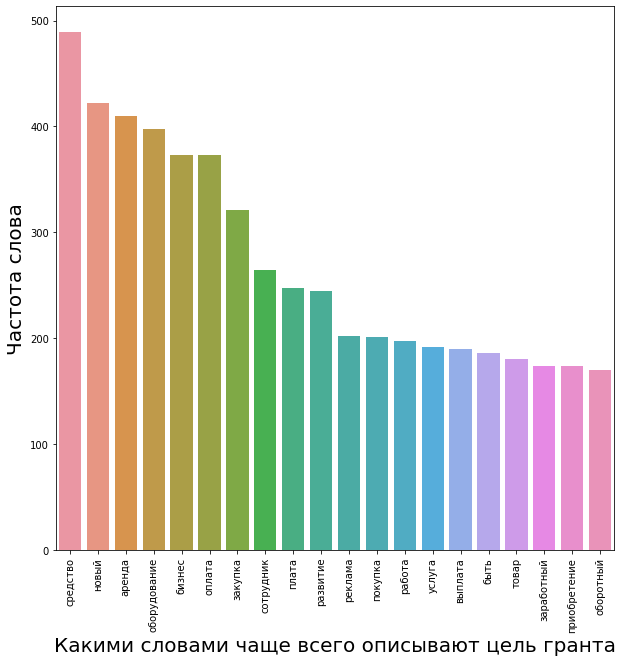

In [57]:
ax = sns.barplot(x="index", y=0, data=df_clp)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set_xlabel(xlabel='Какими словами чаще всего описывают цель гранта', size = 20)
ax.set_ylabel(ylabel='Частота слова', size = 20)
ax